In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import numpy as np
import re
import time
import datetime
import matplotlib.dates as mdates
from math import ceil

from collections import Counter

#### Statistical analysis

In [2]:
def extract_split_data(data):    
    content = re.findall("\[(.*?)\]", data)
   
    values = []
    for c in content[0].split(","):
        c = (c.strip()[1:-1])
        if len(c)>21:  
            x, y = c.split("#")
            values.append(int(x))
           
    return values

In [3]:
def gsr_analysis(span):
    sessionCount = 0
    veryBeginning = []
    nearEnd = []
    duringGame = []

    size = span//2 + 1 # half

    for url in glob.glob("/Users/xueguoliang/Desktop/tmp/*.csv"):

        player = pd.read_csv(url, delimiter=";")

        for session in player['GSR']:       
            rate = extract_split_data(session)

            if len(rate)>span:
                sessionCount += 1
                veryBeginning.append(rate[0:span])
                nearEnd.append(rate[-1-span:-1])
                if len(rate)%2 == 0:
                    duringGame.append(rate[len(rate)//2-size+1:len(rate)//2+size-1])
                else:
                    duringGame.append(rate[len(rate)//2-size+1:len(rate)//2+size-1])


    print("We have collected {} games.".format(sessionCount))
    print("The size of GSR sample is {}.".format(span))
    

    #plot
    fig, ax = plt.subplots(3, 2, figsize=(15,15))
    labels = ["Postive", "Negative"]

    ########################################## Begin ##################################################

    std_begin = []
    slope_begin = []
    for item in veryBeginning:
        slope_begin.append((item[-1]-item[0])/(len(item)-1))
        std_begin.append(round(np.std(item), 2))

    begin_pos = sum([1 for x in slope_begin if x > 0])
    begin_nag = sum([1 for x in slope_begin if x < 0])
    dict_begin = {1:begin_pos, 2:begin_nag}

    ax[0][0].set_title("Distribution of STD for Beginning of game")
    ax[0][0].hist(std_begin, bins=50, range=(min(std_begin), max(std_begin)))
    #ax[0][0].set_xlim([0,10])
    #ax[0][0].set_ylim([0,400])

    ax[0][1].set_title("Distribution of Slope(+,-) for Beginning of game")
    ax[0][1].bar(range(len(dict_begin)), dict_begin.values(), color='g')

    ax[0][1].set_xticklabels(("","","Positive","","","", "Negative"))

    ########################################## During #################################################

    std_during = []
    slope_during = []    
    for item in duringGame:
        slope_during.append((item[-1]-item[0])/(len(item)-1))
        std_during.append(round(np.std(item), 2))

    during_pos = sum([1 for x in slope_during if x > 0])
    during_nag = sum([1 for x in slope_during if x < 0])
    dict_during = {1:during_pos, 2:during_nag}

    ax[1][0].set_title("Distribution of STD for During of game")
    ax[1][0].hist(std_during, bins=50, range=(min(std_during), max(std_during)))
    #ax[1][0].set_xlim([0,300])

    ax[1][1].set_title("Distribution of Slope(+,-) for During of game")
    ax[1][1].bar(list(dict_during.keys()), dict_during.values(), color='g')

    ax[1][1].set_xticklabels(("","","Positive","","","", "Negative"))


    ########################################## End ###################################################

    std_end = []
    slope_end = []
    for item in nearEnd:
        slope_end.append((item[-1]-item[0])/(len(item)-1))
        std_end.append(round(np.std(item), 2))

    end_pos = sum([1 for x in slope_end if x > 0])
    end_nag = sum([1 for x in slope_end if x < 0])
    dict_end = {1:end_pos, 2:end_nag}

    ax[2][0].set_title("Distribution of STD for End of game")
    ax[2][0].hist(std_end, bins=50, range=(min(std_end), max(std_end)))
    #ax[2][0].set_xlim([0,100])

    ax[2][1].set_title("Distribution of Slope(+,-) for End of game")
    ax[2][1].bar(list(dict_end.keys()), dict_end.values(), color='g')

    ax[2][1].set_xticklabels(("","","Positive","","","", "Negative"))


    plt.show()   

We have collected 170 games.
The size of GSR sample is 20.


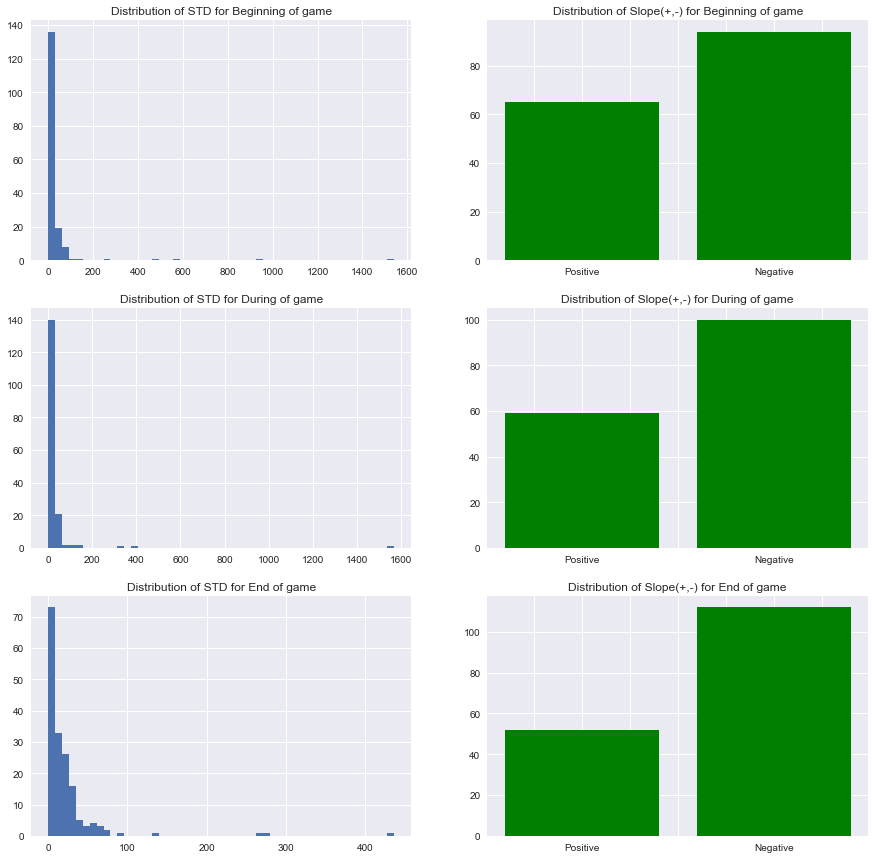

We have collected 114 games.
The size of GSR sample is 50.


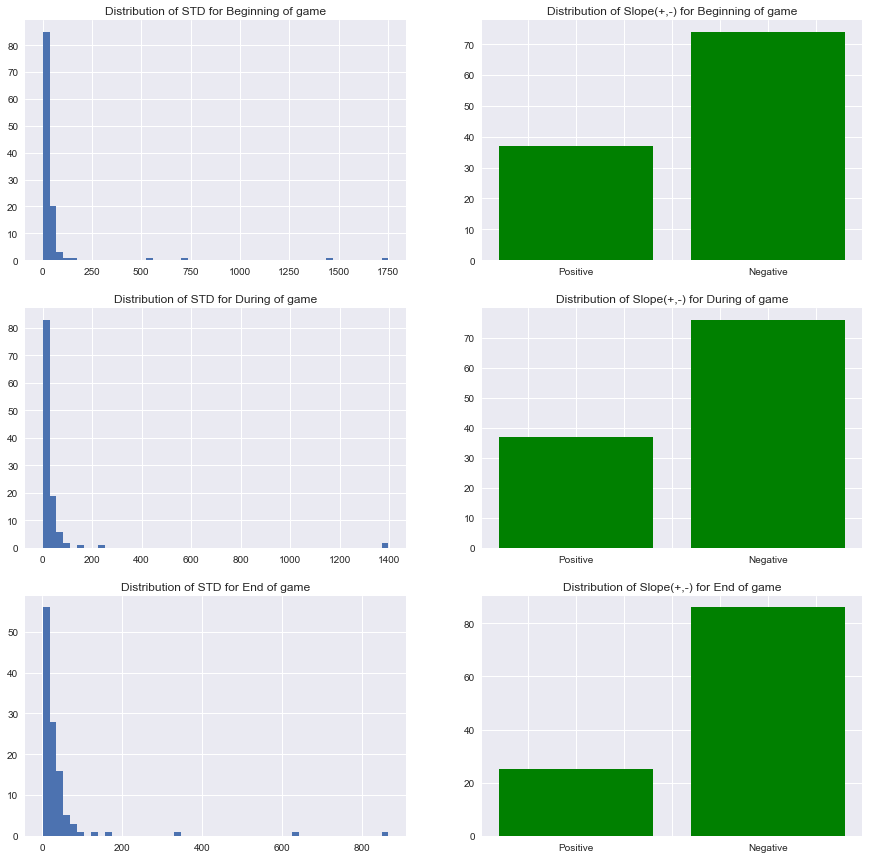

We have collected 48 games.
The size of GSR sample is 100.


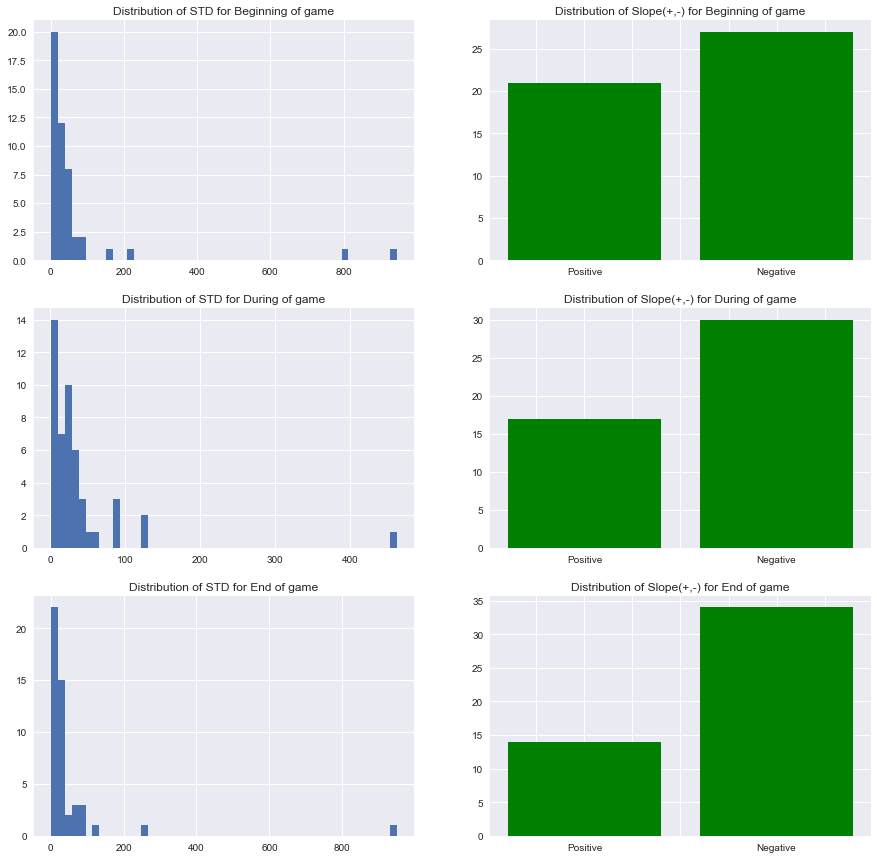

We have collected 29 games.
The size of GSR sample is 150.


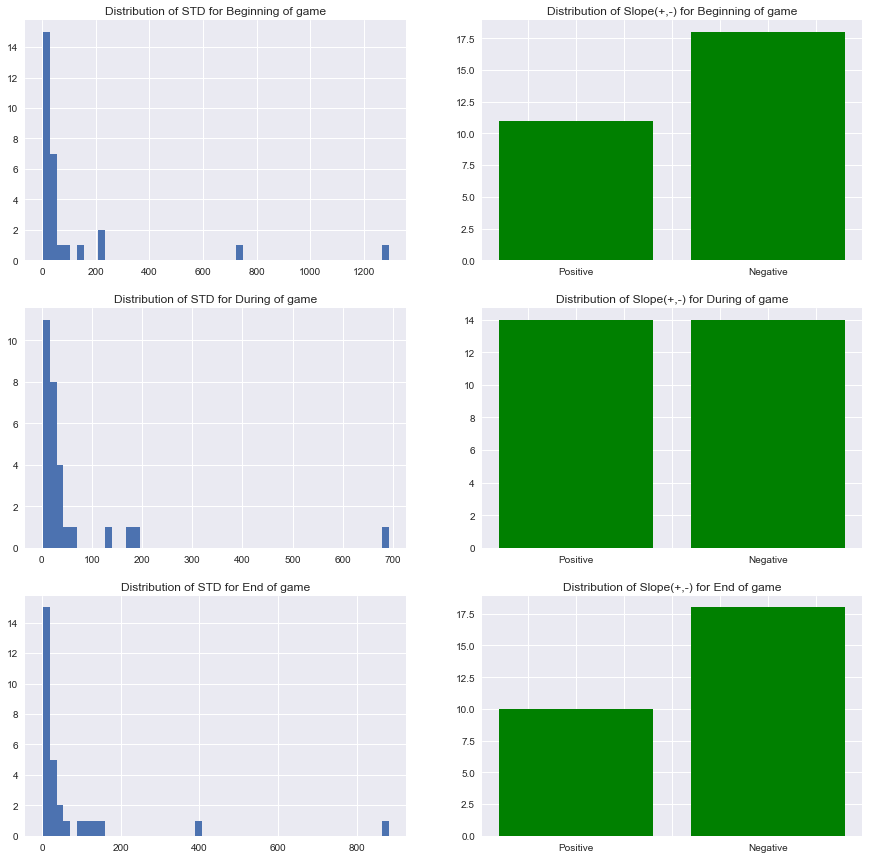

We have collected 13 games.
The size of GSR sample is 250.


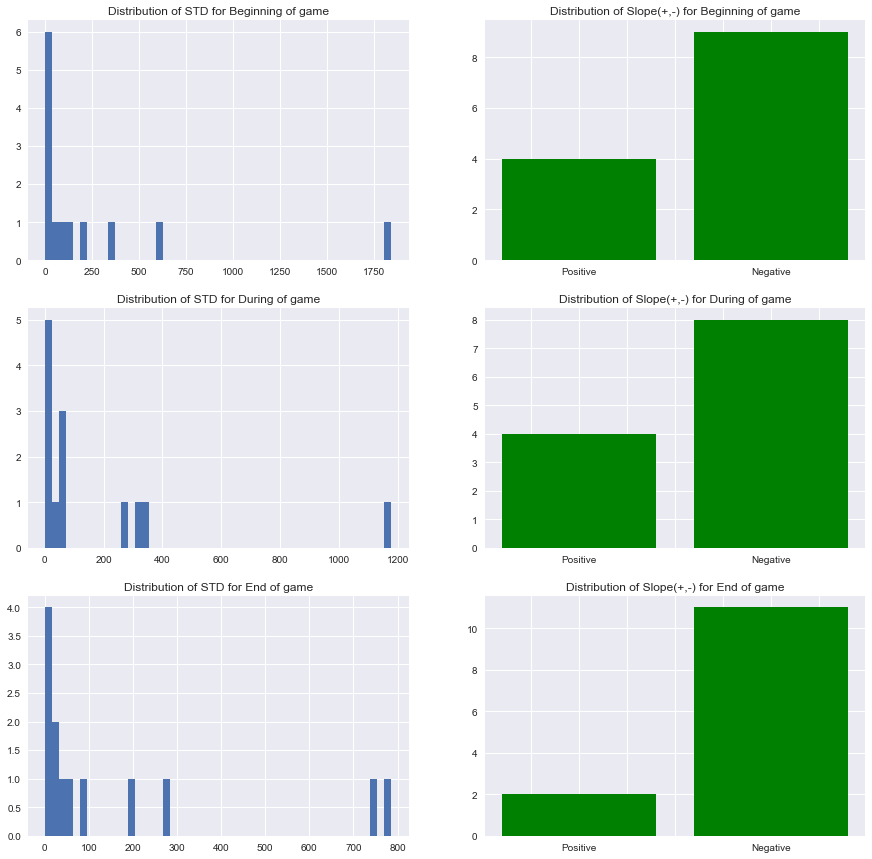

In [4]:
test = [20, 50, 100, 150, 250]

for t in test:
    gsr_analysis(t)

#### Decision Tree / SVM Model 

In [ ]:
dictBeginning = {"begin": veryBe}